<a href="https://colab.research.google.com/github/Nkanga-Pedro/ExplorandoDados/blob/main/TP_AA_NP_Act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendações

O objetivo de um sistema de recomendação é modelar os comportamentos históricos dos utilizadores de modo que possamos prever o que um utilizador individual provavelmente desfrutará no futuro. Em suma, gostaríamos de criar recomendações personalizadas de acordo com o interesse de cada utilizador.

In [55]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [57]:
movie=pd.read_csv('movie.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [58]:
tag=pd.read_csv('tag.csv')
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [59]:
rating=pd.read_csv('rating.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


# Analise de dados exploratorio

In [60]:
# Escolher as colunas e renomear
movie.rename(columns={'title':'titulo','genres':'genero'},inplace=True)

In [61]:
tag=tag[['userId','movieId','tag']]
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [62]:
rating=rating[['userId','movieId','rating']]
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [63]:
# Checking up for missing entries
rating.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


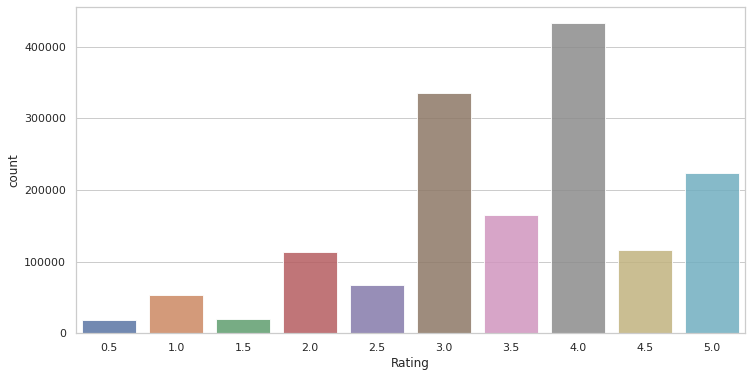

In [64]:
# Histogram
plt.figure(figsize=(12,6))
sns.countplot('rating', data=rating, alpha=0.85)
plt.xlabel('Rating', size=12)
plt.show()

In [65]:
# Quantidade de avaliacao de usuario
rating['userId'].value_counts()

8405    7515
8963    4524
9544    3804
7201    3014
3907    2711
        ... 
9270      20
4610      20
4609      20
6668      20
5039      20
Name: userId, Length: 10451, dtype: int64

In [67]:
# Filmes que tenham mais de 100 avaliacoes
x=rating['userId'].value_counts()>100
x

8405     True
8963     True
9544     True
7201     True
3907     True
        ...  
9270    False
4610    False
4609    False
6668    False
5039    False
Name: userId, Length: 10451, dtype: bool

In [68]:
# Quantidade de usuario que avaliaram
y=x[x].index
print(y.shape)

(3984,)


# Regra de negocio da empresa

In [69]:
# Decisão do negocio - trazendo so usuario que avaliaram
rating=rating[rating['userId'].isin(y)]

In [70]:
# Juntar as tabelas
rating_filme=rating.merge(movie,on='movieId')
rating_filme.head()

,userId,movieId,rating,titulo,genero
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy


In [71]:
# Qte de avaliacao por filme
num_rating=rating_filme.groupby('titulo')['rating'].count().reset_index()
num_rating

,titulo,rating
0,'71 (2014),4
1,'Hellboy': The Seeds of Creation (2004),3
2,'R Xmas (2001),1
3,'Round Midnight (1986),11
4,'Salem's Lot (2004),5
...,...,...
15543,xXx (2002),290
15544,xXx: State of the Union (2005),46
15545,¡Three Amigos! (1986),425
15546,À nos amours (1983),2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


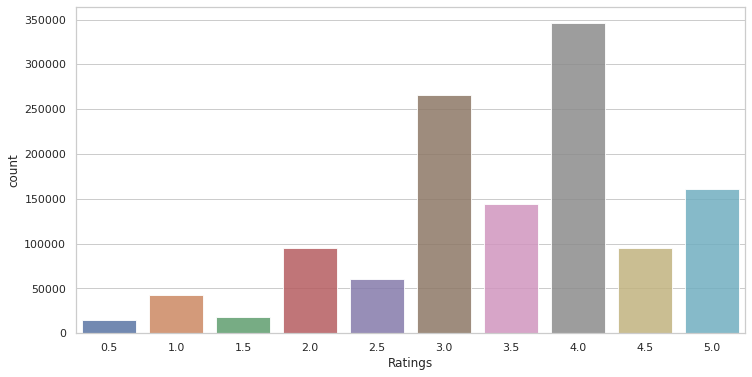

In [72]:
# Histogram
plt.figure(figsize=(12,6))
sns.countplot('rating', data=rating_filme, alpha=0.85)
plt.xlabel('Ratings', size=12)
plt.show()

In [83]:
# Renomear o campo rating
num_rating.rename(columns={'rating':'num_aval'},inplace=True)
num_rating

,titulo,num_aval
0,'71 (2014),4
1,'Hellboy': The Seeds of Creation (2004),3
2,'R Xmas (2001),1
3,'Round Midnight (1986),11
4,'Salem's Lot (2004),5
...,...,...
15543,xXx (2002),290
15544,xXx: State of the Union (2005),46
15545,¡Three Amigos! (1986),425
15546,À nos amours (1983),2


In [89]:
# Juntar a tabela num_rating e filme_avaliacao
final_rating=rating_filme.merge(num_rating,on='titulo')
final_rating

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,1251
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251
...,...,...,...,...,...,...
1244125,10443,109853,3.0,Barefoot (2014),Comedy|Drama|Romance,1
1244126,10443,119147,0.5,Holidaze (2013),Children|Drama|Romance,1
1244127,10443,121322,1.0,The Final Girl (2010),Drama,1
1244128,10443,121324,1.5,Dot and the Whale (1986),Animation|Children,1


In [90]:
print(f'Numero Total de Avaliação: {len(final_rating)} \nNumero Total de Utilizador: {len(final_rating.userId.unique())} \
\nMedia de Avaliação por Utilizador: {round(len(final_rating)/len(final_rating.userId.unique()),2)}')

Numero Total de Avaliação: 1244130 
Numero Total de Utilizador: 3984 
Media de Avaliação por Utilizador: 312.28


In [86]:
# Decisao do negocio - filme que foram avaliado mais de 20000 vezes
#final_rating=final_rating[final_rating['num_aval']>=20000]
#final_rating.shape

(0, 6)

In [91]:
final_rating.head()

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,1251
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251


In [92]:
# Let's see the users that rated more
more = final_rating.groupby('userId').num_aval.count().sort_values(ascending=False)

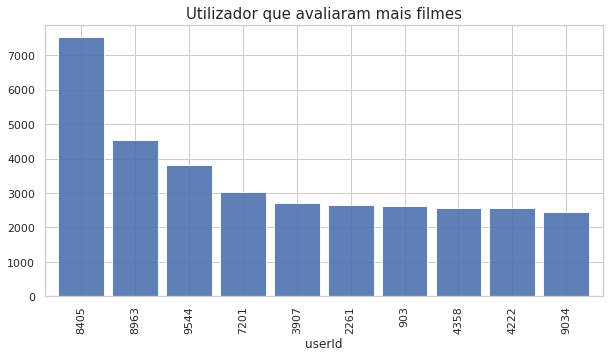

In [94]:
# Plotting the top 10 raters
plt.figure(figsize=(10,5))
more.head(10).plot(kind='bar', alpha=0.9, width=0.85)
plt.title("Utilizador que avaliaram mais filmes", size=15)
plt.show()

In [95]:
# Criando um conjunto de quantis de 0 a 100% com passo de 1%
quantiles = more.quantile(np.arange(0,1.01,0.01), interpolation='higher')

#quantiles Log scale
quantiles_log = np.log(quantiles)

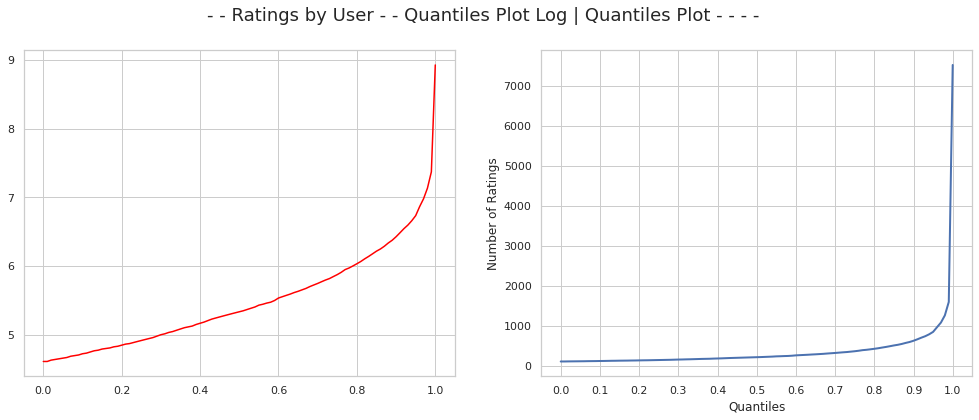

In [96]:
# Plot of the quantiles
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,6))
ax1.plot(quantiles_log, c='red')
ax2.plot(quantiles, linewidth=2)
fig.suptitle('- - Ratings by User - - Quantiles Plot Log | Quantiles Plot - - - -', size=18)
plt.xlabel('Quantiles')
plt.ylabel('Number of Ratings')
plt.xticks(np.arange(0.,1.01, 0.1))
plt.show()

In [99]:
# Quantity of users that rated more than 50 products
print(f'Avaliaram 50 ou mais de 50 filmes: {sum(more>=50)}')

Avaliaram 50 ou mais de 50 filmes: 3984


# Recomendado com base na Popularidade

O sistema de recomendação mais simples a ser construído é aquele baseado na popularidade, ou por outras palavras, apenas calculará as quantidades de revisões e a média de cada item e calculará uma classificação com base nisso. O problema é que não lhe permite qualquer tipo de personalização.

In [102]:
# Recomendador baseado em popularidade
# Dataframe with products that have more than 50 rates
new_df=final_rating.groupby("movieId").filter(lambda x:x['num_aval'].count() >=50)

In [103]:
new_df.head(10)

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
3,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,1251
4,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251
5,116,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,1251
6,124,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,1251
7,129,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
8,131,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,1251
9,132,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251


In [104]:
# Criando um novo DataFrame com classificação média e número de classificações por produto
rating_df = pd.DataFrame(new_df.groupby('movieId').rating.mean())

In [105]:
# Adicionando coluna com número de avaliações por produto
rating_df['rating_counts'] = new_df.groupby('movieId').rating.count()

In [106]:
# Visualizing the 5 top rated products (number of ratings)
rating_df.sort_values(by='rating_counts', ascending=False).head(5)

,rating,rating_counts
movieId,,
356,3.962126,2944
296,4.225246,2848
593,4.169636,2750
480,3.611602,2715
260,4.207695,2677


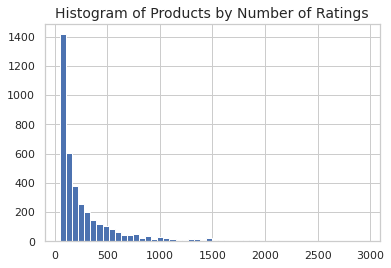

In [107]:
# Plot Histogram of the counts
rating_df.rating_counts.hist(bins=50)
plt.title('Histogram of Products by Number of Ratings', size=14)
plt.show()

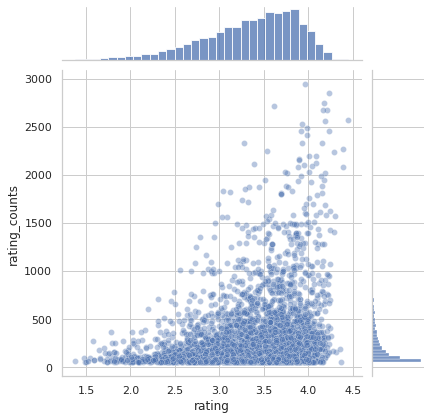

In [109]:
# Gráfico de dispersão das classificações vs. contagens
sns.jointplot(x='rating', y='rating_counts', data=rating_df, alpha=0.4)
plt.show()

In [110]:
# The global average of the ratings
C = rating_df['rating'].mean()
print(round(C,2))

3.36


In [111]:
# Use the minimum number of votes required to be in the popularity recommender
m = rating_df.rating_counts.min(); 
m

50

Definir uma função para calcular uma média ponderada que toma o número total de votos e o limiar (50) e multiplicá-lo pela média global e pela média do produto. A fórmula é: (v/(v+m) * R) + (m/(m+v) * C)

*   v é o número de votos para o produto;
*  m é o número mínimo de votos exigido para ser listado no gráfico;
*   R é a classificação média do produto;
*   C é o voto médio em todo o relatório

In [112]:
# Função que calcula a classificação ponderada de cada filme
def weighted_rating(x, m=m, C=C):
    v = x['rating_counts']
    R = x['rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [113]:
# Adicione o 'score' calculado com weighted_rating() ao dataframe
rating_df['score'] = rating_df.apply(weighted_rating, axis=1)

Resultado final com os 15 produtos mais **populares** texto em negrito

In [115]:
# Resultado final com os 15 produtos mais populares
rating_df.sort_values(by='score', ascending=False).head(10)

,rating,rating_counts,score
movieId,,,
318,4.445656,2567,4.424818
858,4.389904,2080,4.365610
50,4.384496,2264,4.362252
527,4.288272,2234,4.267842
1221,4.295296,1573,4.266328
912,4.285664,1409,4.253770
1198,4.232558,2451,4.215014
1193,4.237215,1623,4.210849
296,4.225246,2848,4.210231


# Sistema de filtragem  baseado em colaborativa

In [123]:
# Model-based collaborative filtering system
new_df.head(3)

,userId,movieId,rating,titulo,genero,num_aval
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,1251
1,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251
2,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,1251


In [124]:
# pivot table : transpor a linha em coluna
filme_pivot=new_df.pivot_table(columns='userId',index='titulo',values='rating')

In [125]:
filme_pivot

userId,1,3,7,11,14,18,21,22,23,24,...,10430,10433,10434,10435,10436,10437,10443,10446,10447,10448
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
*batteries not included (1987),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zulu (1964),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[REC] (2007),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [126]:
filme_pivot.fillna(0,inplace=True)

In [127]:
filme_pivot

userId,1,3,7,11,14,18,21,22,23,24,...,10430,10433,10434,10435,10436,10437,10443,10446,10447,10448
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
*batteries not included (1987),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zulu (1964),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[REC] (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


# Utilizando o algoritmo KNN - distancia euclidiana

In [128]:
# Transformar em amtriz esparsa
from scipy.sparse import csr_matrix

In [129]:
filme_sparse=csr_matrix(filme_pivot)

In [130]:
filme_sparse

<3810x3984 sparse matrix of type '<class 'numpy.float64'>'
	with 1126157 stored elements in Compressed Sparse Row format>

In [131]:
from sklearn.neighbors import NearestNeighbors

model=NearestNeighbors(algorithm='brute')
model.fit(filme_sparse)

NearestNeighbors(algorithm='brute')

In [132]:
filme_pivot

userId,1,3,7,11,14,18,21,22,23,24,...,10430,10433,10434,10435,10436,10437,10443,10446,10447,10448
titulo,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
*batteries not included (1987),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zulu (1964),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[REC] (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [133]:
# Testando o exemplo
distances,sugestions=model.kneighbors(filme_pivot.iloc[0,:].values.reshape(1,-1))

In [134]:
# Fazendo a predicao e sugestao do filme - filme com titulo 2001: A Space Odyssey (1968)
for i in range(len(sugestions)):
    print(filme_pivot.index[sugestions[i]])

Index([''burbs, The (1989)', 'Funny Farm (1988)', 'Armed and Dangerous (1986)',
       'Caddyshack II (1988)', 'Who's Harry Crumb? (1989)'],
      dtype='object', name='titulo')


# Outra forma a tentar mais
# Decompondo a Matriz.
A função SVD truncada irá de facto reduzir a dimensão da matriz esparsa no número de componentes solicitados

In [140]:
SVD_model = TruncatedSVD(n_components=10)
decomposed_matrix = SVD_model.fit_transform(filme_pivot)
decomposed_matrix.shape

(3810, 10)

In [141]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(3810, 3810)

In [142]:
correlation_matrix

array([[1.        , 0.26917355, 0.80363014, ..., 0.47230796, 0.58716496,
        0.97875285],
       [0.26917355, 1.        , 0.50554782, ..., 0.2683122 , 0.38926309,
        0.26928927],
       [0.80363014, 0.50554782, 1.        , ..., 0.59468734, 0.85071778,
        0.79006969],
       ...,
       [0.47230796, 0.2683122 , 0.59468734, ..., 1.        , 0.68854285,
        0.47013104],
       [0.58716496, 0.38926309, 0.85071778, ..., 0.68854285, 1.        ,
        0.58113714],
       [0.97875285, 0.26928927, 0.79006969, ..., 0.47013104, 0.58113714,
        1.        ]])

In [146]:
i = "'burbs, The (1989)"

product_names = list(filme_pivot.index)
product_ID = product_names.index(i)
product_ID

0

In [148]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(3810,)

In [149]:
Recommend = list(filme_pivot.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['*batteries not included (1987)',
 '...And Justice for All (1979)',
 '10 (1979)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '13th Warrior, The (1999)',
 '1984 (Nineteen Eighty-Four) (1984)',
 '2 Days in the Valley (1996)',
 '20 Dates (1998)']